# Bridge


## O que é?

O padrao _bridge_, também conhecido como _handle/body_, permite a desassociação da abstração de suas Implementações, permitindo que ambos mudem independentemente.

## Por quê?

O _bridge pattern_ é usado quando uma abstração pode ter uma ou mais possiveis implementações, mas quando a logica de negocio impoe uma variacao entre abstração e implementação que torna a heranca entre classes muito restritiva ou confusa. O _bridge_ pattern permite a combinação de cada abstração com cada implementação sem precisar escrever uma classe para cada possivel combinação.

## Uso:

Voce deve usar o _bridge pattern_ quando:
- Voce deseja evitar acoplar permanentemente a abstração e sua implementação, isso se aplica quando eh necessario mudar a implementação enquanto o programa esta rodando
- Ambas (abstração e implementação) devem ser extendida por sub classes, nesse caso o _bridge pattern_ te permite combinar diversas abstrações e implementações e extender cada uma independentemente
- Mudanças na implementação nao devem impactar o codigo cliente (nao devemos recompilar o cliente)
- O numero de classes tem crescido exponencialmente? Talves voce deva implementar 0 _bridge pattern_

## Estrutura: 

![struct](https://www.dofactory.com/images/diagrams/net/bridge.gif)

## Exemplo:

Imagine que estamos fazendo o front end de uma loja on line Blabamazon e precisamos mostrar livros, filmes e albuns em nossa loja, porem como somos uma loja on line precisamos ter diversas views para mostrar nossos produtos em diversas plataformas: mobile, tablet e desktop. 


Se fossemos usar inheritance para fazer isso, nos teriamos que ter nove classes (mobile_book, mobile_movie, mobile_album, tablet_book...), e imagine se tivermos uma nova view (TV), teriamos que escrever uma versao para cada produto e a mesma coisa acontece para cada novo tipo de produto. 


Mas como nos estudamos design patterns nos vamos fazer isso usando o _bridge pattern_, que eh muito mais scalable.
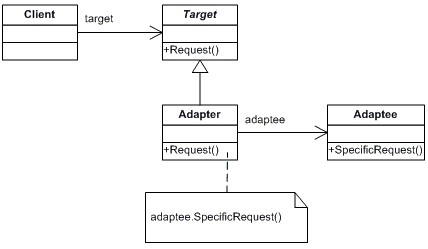

In [13]:
from __future__ import annotations
from abc import ABC, abstractmethod


class View:
    """
    The View Abstraction defines the view methods.
    """

    def __init__(self, implementation: Implementation) -> None:
        self.implementation = implementation

    def display(self) -> str:
        return (f"View Abstraction:\n"
                f"{self.implementation.title()}")


class MobileView(View):
    """
    Define the mobile media view.
    """

    def display(self) -> str:
        return (f"{self.implementation.title}\n"
                f"{self.implementation.author}")

class TabletView(View):
    """
    Define the tablet media view.
    """

    def display(self) -> str:
        return (f"{self.implementation.title}\n"
                f"{self.implementation.description}\n"
                f"{self.implementation.author}")

class DesktopView(View):
    """
    Define the tablet media view.
    """

    def display(self) -> str:
        return (f"{self.implementation.title}\n"
                f"{self.implementation.score}\n"
                f"{self.implementation.description}\n"
                f"{self.implementation.author}\n"
                f"{self.implementation.authorBio}")


class MediaType(ABC):
    """
    Media type defines an interface that allow a media to be displayed 
    in the different views
    """

    @abstractmethod
    def title(self) -> str:
        pass

    @abstractmethod
    def score(self) -> str:
        pass

    @abstractmethod
    def description(self) -> str:
        pass

    @abstractmethod
    def author(self) -> str:
        pass

    @abstractmethod
    def authorBio(self) -> str:
        pass

    @abstractmethod
    def image(self) -> str:
        pass


"""
Each Concrete Implementation corresponds to a different media type (film, album, book)
"""


class Book(MediaType):
    def __init__(self, title: str, author: str, description: str, score: str, authorBio: str, image: str) -> None:
        self.title = title
        self.author = author
        self.description = description
        self.score = score
        self.authorBio = authorBio
        self.image = image

    def title(self) -> str:
        return self.title

    def score(self) -> str:
        return self.score

    def description(self) -> str:
        return self.description

    def author(self) -> str:
        return  f"author: {self.author}"

    def authorBio(self) -> str:
        return self.authorBio

    def image(self) -> str:
        return self.image


class Album(MediaType):
    def __init__(self, title: str, band: str, description: str, score: str, bandBio: str, image: str) -> None:
        self.title = title
        self.band = band
        self.description = description
        self.score = score
        self.bandBio = bandBio
        self.image = image

    def title(self) -> str:
        return self.title

    def score(self) -> str:
        return self.score

    def description(self) -> str:
        return self.description

    def author(self) -> str:
        return  self.band

    def authorBio(self) -> str:
        return self.bandBio

    def image(self) -> str:
        return self.image

class Movie(MediaType):
    def __init__(self, title: str, director: str, leadActors: str, description: str, score: str, directorMovies: str, image: str) -> None:
        self.title = title
        self.director = director
        self.leadActors = leadActors
        self.description = description
        self.score = score
        self.directorMovies = directorMovies
        self.image = image

    def title(self) -> str:
        return self.title

    def score(self) -> str:
        return self.score

    def description(self) -> str:
        return self.description

    def author(self) -> str:
        return  f"author: {self.director}"

    def authorBio(self) -> str:
        return self.directorMovies

    def image(self) -> str:
        return self.image


def client_code(view: View) -> None:
    """
    Except for the initialization phase, where an View object gets linked
    with a specific Media Type object, the client code should only depend on
    the View class. This way the client code can support any  view-media 
    (abstraction-implementation) combination.
    """

    # ...

    print(view.display())

    # ...


if __name__ == "__main__":
    """
    The client code should be able to work with any pre-configured abstraction-
    implementation combination.
    """
    booDescription = "The Foundation series is Isaac Asimov’s iconic masterpiece.Unfolding against the backdrop of a crumbling Galactic Empire, the story of Hari Seldon’s two Foundations is a lasting testament to an extraordinary imagination, one whose unprecedented scale shaped science fiction as we know it today."
    asimov = "Isaac Asimov was an American writer and professor of biochemistry at Boston University. He was known for his works of science fiction and popular science. Asimov was a prolific writer who wrote or edited more than 500 books and an estimated 90,000 letters and postcards. Asimov wrote hard science fiction."

    filmDescription = "Rick Deckard, an ex-policeman, becomes a special agent with a mission to exterminate a group of violent androids. As he starts getting deeper into his mission, he questions his own identity."
    directorBio = "Sir Ridley Scott (born 30 November 1937) is an English filmmaker. He is best known for directing the science fiction horror film Alien (1979), the neo-noir dystopian film Blade Runner (1982), the road adventure film Thelma & Louise (1991), the historical drama film Gladiator (2000), the war film Black Hawk Down (2001), and the science fiction film The Martian (2015)."

    book = Book("Foundation", "Isaac Asimov", booDescription, "5 starts", asimov, ";==>")
    film = Movie("Blade Runner","Ridley Scott","Harrison Ford, Rutger Hauer, Sean Young",filmDescription,"5 Stars",directorBio," ;) ")
    
    mobileView = MobileView(book)
    client_code(mobileView)

    print("\n")

    mobileView = MobileView(film)
    client_code(mobileView)

    print("\n")

    tabletView = TabletView(film)
    client_code(tabletView)

    print("\n")

    deskView = DesktopView(film)
    client_code(deskView)

    print("\n")

    deskView = DesktopView(book)
    client_code(deskView)

Foundation
Isaac Asimov


Blade Runner
<bound method Movie.author of <__main__.Movie object at 0x7f96ef1ea2b0>>


Blade Runner
Rick Deckard, an ex-policeman, becomes a special agent with a mission to exterminate a group of violent androids. As he starts getting deeper into his mission, he questions his own identity.
<bound method Movie.author of <__main__.Movie object at 0x7f96ef1ea2b0>>


Blade Runner
5 Stars
Rick Deckard, an ex-policeman, becomes a special agent with a mission to exterminate a group of violent androids. As he starts getting deeper into his mission, he questions his own identity.
<bound method Movie.author of <__main__.Movie object at 0x7f96ef1ea2b0>>
<bound method Movie.authorBio of <__main__.Movie object at 0x7f96ef1ea2b0>>


Foundation
5 starts
The Foundation series is Isaac Asimov’s iconic masterpiece.Unfolding against the backdrop of a crumbling Galactic Empire, the story of Hari Seldon’s two Foundations is a lasting testament to an extraordinary imagination, one

## Prós e contras:

### Prós

- Reduz o numero de classes (em implementacoes complexas)
- Promove o decoupling entre o cliente e a interface
- Permite que a abstraction mude independente do implementor e vice versa

### Contras

- Complexo
- Nao se aplica para problemas pequenos, (no exemplo, se usassemos inheritance teriamos 9 classes e usando bridge temos 8)


## Discussao:

1. Como o _Bridge Pattern_ difere do _Strategy_ e o seu contexto??

2. (Bônus): Quais sao as diferencas (e semelhancas) entre o _Adapter_ e o _Bridge_?